# 1-a. Load Data + Basic Imports

In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [94]:
#Basic Data Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

#VIF Testing (Categorical Columns)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Pipeline packages 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

#Data Splitting
from sklearn.model_selection import train_test_split

#GridSearchCV + Scoring
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#Regressor Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

#Voting and Stacking
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [52]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
train_extra_df = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')

# 1-b. Initial Analysis of Data Types + Distributions

In [53]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None


In [54]:
#train_df.head(15)
#train_df.tail(15)
train_df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [55]:
#Total Counts of Missing Data
pd.DataFrame(train_df.isnull().sum())

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [56]:
#Creating a quick function for Categorical Data Distribution viewing
def cat_quick_plot(df, name):
    plt.clf()
    fig, axes = plt.subplots(1,2,figsize=(15, 4))
    axes = axes.flatten()
    
    value_counts = df[name].value_counts().reset_index()
    value_counts.columns = [name, 'Frequency']
    
    sns.barplot(value_counts, x=name, y='Frequency', ax = axes[0])
    axes[0].set_title(f'{name} Frequencies', fontweight='bold')
    axes[0].set_xlabel(f'{name}', fontweight='bold')
    axes[0].set_ylabel('Frequency', fontweight='bold')
    
    sns.boxplot(train_df, x=name, y='Price', ax=axes[1])
    axes[1].set_title(f'{name} Price Distributions', fontweight='bold')
    axes[1].set_xlabel(f'{name}', fontweight='bold')
    axes[1].set_ylabel('Price', fontweight='bold')
    plt.show()

<Figure size 640x480 with 0 Axes>

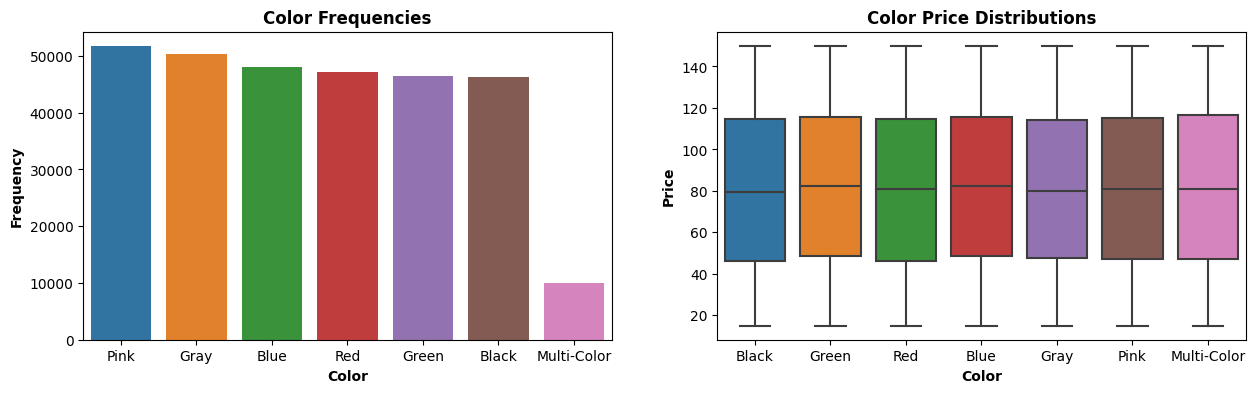

In [89]:
#Plots for Brand Data
# cat_quick_plot(train_df, 'Brand')

#Plots for Material Data
# cat_quick_plot(train_df, 'Material')

#Plots for Size Data
# cat_quick_plot(train_df, 'Size')

#Plots for Laptop Compartment Data
# cat_quick_plot(train_df, 'Laptop Compartment')

#Plots for Waterproof Data
# cat_quick_plot(train_df, 'Waterproof')

#Plots for Style Data
# cat_quick_plot(train_df, 'Style')

#Plots for Color Data
cat_quick_plot(train_df, 'Color')

<Figure size 640x480 with 0 Axes>

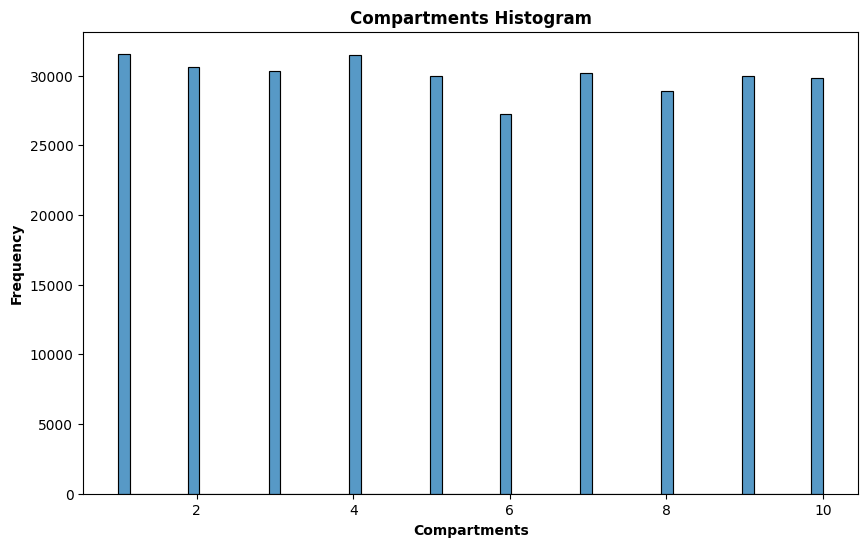

In [64]:
#Compartments Graphing attempt 1
# plt.clf()
# fig, axes = plt.subplots(1,1,figsize=(10,6))

# sns.stripplot(data=train_df, x='Compartments', y='Price', ax=axes, jitter=True, alpha=.7)
# axes.set_title('Compartments vs Price Scatterplot', fontweight='bold')
# axes.set_xlabel('Compartments', fontweight='bold')
# axes.set_ylabel('Price', fontweight='bold')
# plt.show()

#Compartments Graphing attempt 2
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(10,6))

sns.histplot(data=train_df, x='Compartments', ax=axes, stat='count')
axes.set_title('Compartments Histogram', fontweight='bold')
axes.set_xlabel('Compartments', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

<Figure size 640x480 with 0 Axes>

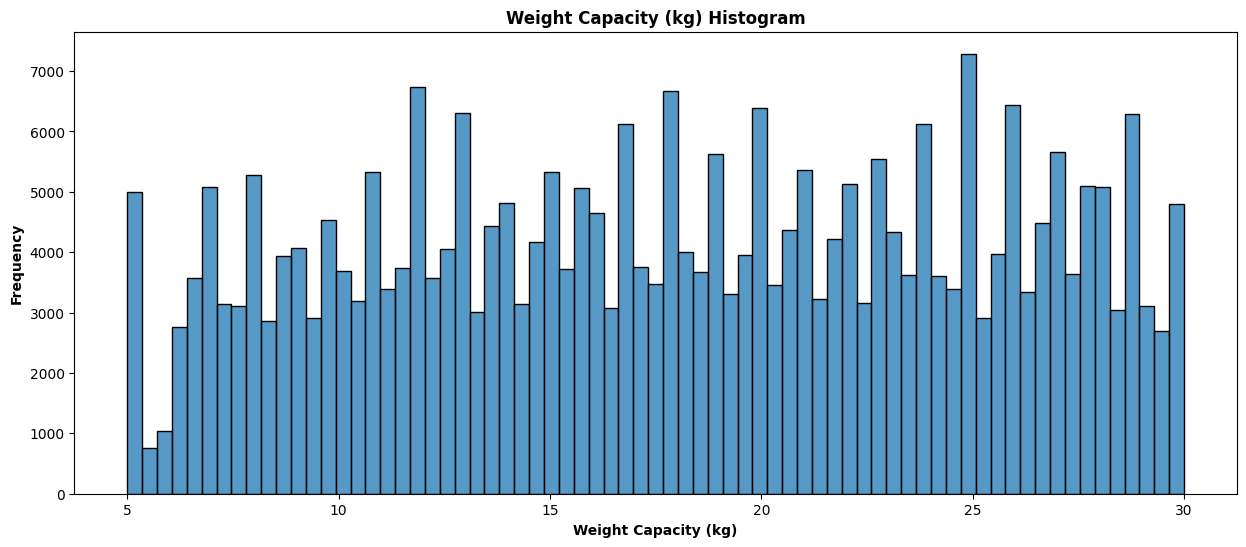

In [65]:
#Weight Capacity (kg) Graphing attempt 1 (Warning: Kaggle froze while computing this chart)
# plt.clf()
# fig, axes = plt.subplots(1,1,figsize=(10,6))

# sns.stripplot(data=train_df, x='Weight Capacity (kg)', y='Price', ax=axes, jitter=True, alpha=.7)
# axes.set_title('Weight Capacity (kg) vs Price Scatterplot', fontweight='bold')
# axes.set_xlabel('Weight Capacity (kg)', fontweight='bold')
# axes.set_ylabel('Price', fontweight='bold')
# plt.show()

#Weight Capacity (kg) Graphing attempt 2
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(15,6))

sns.histplot(data=train_df, x='Weight Capacity (kg)', ax=axes, stat='count')
axes.set_title('Weight Capacity (kg) Histogram', fontweight='bold')
axes.set_xlabel('Weight Capacity (kg)', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

<Figure size 640x480 with 0 Axes>

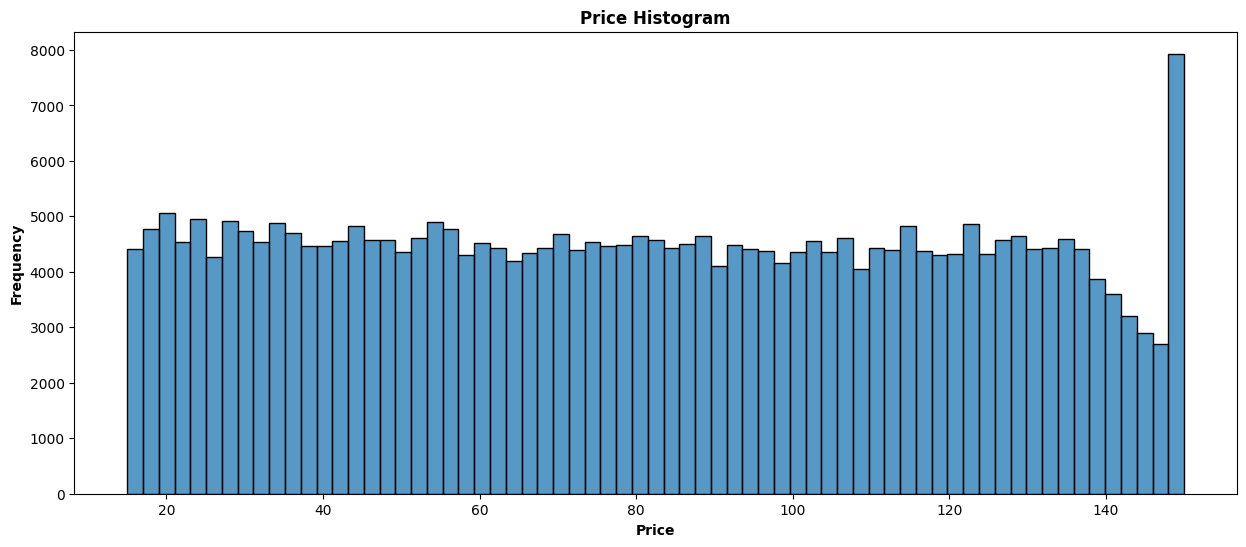

In [66]:
#Price Histrogram quick look
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(15,6))

sns.histplot(data=train_df, x='Price', ax=axes, stat='count')
axes.set_title('Price Histogram', fontweight='bold')
axes.set_xlabel('Price', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

In [67]:
train_df[train_df.isna().any(axis=1)].shape
#Finding: 57,199 entries are distributed across 53,314 rows (only 7% overlap in NaN fields)... recommend to not drop rows due to limited overlap

(53314, 11)

# 1-c. Data Cleanup Decisions
* Weight Capacity (kg) --> fillna with mean(), convert to buckets after describe check
    * [0-10), [10-20), [20-inf)
* Color --> fillna with 'Multi-Color'
* Size --> fillna with 'Other'
* Waterproof --> fillna with 'Undetermined'
* Brand --> fillna with 'Unknown'
* Compartments --> convert to int (from float)
* Laptop Compartment --> fillna with 'Unknown'

# 2-a. Data Cleanup Pipeline

In [68]:
#Rename columns with _ fillers
train_df.rename(columns={'Weight Capacity (kg)': 'Weight_Capacity_(kg)', 'Laptop Compartment': 'Laptop_Compartment'}, inplace=True)
test_df.rename(columns={'Weight Capacity (kg)': 'Weight_Capacity_(kg)', 'Laptop Compartment': 'Laptop_Compartment'}, inplace=True)

In [69]:
train_df['Color'].fillna('Multi-Color', inplace=True)
train_df['Size'].fillna('Other', inplace=True)
train_df['Waterproof'].fillna('Undetermined', inplace=True)
train_df['Brand'].fillna('Unknown', inplace=True)
train_df['Compartments'] = train_df['Compartments'].astype('int')
train_df['Laptop_Compartment'].fillna('Unknown', inplace=True)
train_df['Style'].fillna('Mixed_Style', inplace=True)
train_df['Material'].fillna('Mixed_Material', inplace=True)
train_df['Weight_Capacity_(kg)'].fillna(train_df['Weight_Capacity_(kg)'].mean(), inplace=True)
train_df['Weight_Capacity_(kg)'] = train_df['Weight_Capacity_(kg)'].apply(lambda x: '0-10' if x < 10 else('10-20' if x < 20 else('20+')))


<Axes: xlabel='Price', ylabel='Count'>

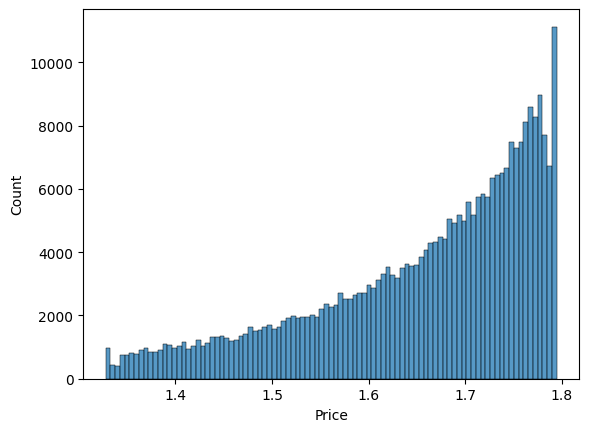

In [97]:
train_df['Price'] = np.log1p(train_df['Price'])
sns.histplot(train_df, x=train_df['Price'])

In [77]:
#Column Lists--------------

ohe_cols = ['Weight_Capacity_(kg)', 'Brand', 'Material', 'Style', 'Color']
ode_cols = ['Size', 'Laptop_Compartment', 'Waterproof']
num_cols = ['Compartments']

In [82]:
#Pipeline creation for data encoding--------------

#Create Numerical Pipeline
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Create Categorical Pipeline (Ordinal Values)
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

#Create One Hot Encoding Pipeline (Nominal Values)
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#Create column transformer for running pipelines
col_trans = ColumnTransformer(
    transformers=[
        ('num_p', num_pipeline, num_cols),
        ('ode_p', ode_pipeline, ode_cols),
        ('ohe_p', ohe_pipeline, ohe_cols)
    ],
    remainder='passthrough',
    n_jobs=-1)

main_pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])


#correlation map?
#vif score?

# 2-b. Data Prep and Splitting

In [98]:
#Make X and y for encoding
X = train_df.drop('Price', axis=1)
y = train_df['Price']

In [99]:
#Use pipeline to process training data
X_preprocessed = main_pipeline.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=.2, random_state=15)

In [101]:
LR = LinearRegression()
param_grid_LR = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1,5,10,15,None],
    'positive': [True, False]
}

lr_cv = GridSearchCV(LR, param_grid_LR, cv=5, scoring='neg_mean_squared_error')
lr_cv.fit(X_train, y_train)

#Print Linear Regressor CV Results
print('Linear Regressor CV Score (Train Data):')
print(np.sqrt(-1*lr_cv.best_score_))

#Check for Linear Regressor accuracy
y_pred = lr_cv.best_estimator_.predict(X_test)
print('Mean Squared Error (Test Data):')
print(mean_squared_error(y_test, y_pred))
print('\nR2_Score Results (Test Data):')
print(r2_score(y_test, y_pred))

#Print Linear Regressor best params
print('\nLinear Regression Best Parameters:')
print(lr_cv.best_params_)

Linear Regressor CV Score (Train Data):
0.1161940147897636
Mean Squared Error (Test Data):
0.013410402477047481

R2_Score Results (Test Data):
0.0009646752208041232


In [ ]:
RFR = RandomForestRegressor(random_state=15)
param_grid_RFR = {
    'max_depth': [5,10,15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error')
rfr_cv.fit(X_train, y_train)

#Random Forest Regressor CV Results
print('Random Forest Regressor CV Score (Train Data):')
print(np.sqrt(-1*rfr_cv.best_score_))

#Check for Random Forest Regressor accuracy
y_pred = rfr_cv.best_estimator_.predict(X_test)
print('Mean Squared Error (Test Data):')
print(mean_squared_error(y_test, y_pred))
print('\nR2_Score Results (Test Data):')
print(r2_score(y_test, y_pred))

#Random Forest Regressor best params
print('\nRandom Forest Regressor Best Parameters:')
print(rfr_cv.best_params_)

In [72]:
#This requires handling of NaN first
# X = train_df[['Compartments', 'Weight Capacity (kg)']]
# vif_data = pd.DataFrame()
# vif_data['Feature'] = X.columns
# vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print(vif_data)

In [73]:
#Check for MultiCollinearity in numeric data